In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import sys
import numpy as np

sys.path.insert(0, str(Path.cwd() / 'preparation/'))

import data_loader
import preprocess

In [3]:
#sample = data_loader.load_csv_as_df('../../csgo_dataset/parsed_files/renegades-vs-fnatic-m3-inferno.csv')
sample = data_loader.load_csv_as_df('../csgo_dataset/vitality-vs-liquid-m2-dust2.csv')
only_pos_sample = sample[data_loader.get_feature_column_names('PositionX') + data_loader.get_feature_column_names('PositionY')]

In [4]:
tick = 83330.0

In [5]:
#sample.loc[tick-100:tick+100,data_loader.get_feature_column_names('PositionX')[0]]


In [6]:
print(only_pos_sample.columns)

directions = preprocess.all_player_eyeAngles_to_direction_vec3(sample,tick)
positions = preprocess.all_player_position_to_vec3(sample,tick)

raw_positions_x = sample.loc[tick, data_loader.get_feature_column_names('PositionX')].to_numpy()
raw_positions_y = sample.loc[tick, data_loader.get_feature_column_names('PositionY')].to_numpy()

positions_x = [a.components()[0] for a in positions]
positions_y = [a.components()[1] for a in positions]

end_positions_x = [a.__add__(b.__mul__(1000)).components()[0] for a,b in zip(positions,directions)]
end_positions_y = [a.__add__(b.__mul__(1000)).components()[1] for a,b in zip(positions,directions)]

#print("POSX:", positions_x, len(positions_x))
#print("POSY:",positions_y,len(positions_y))
#print("ENDPOSX:",end_positions_x, len(end_positions_x))
#print("ENDPOS<:",end_positions_y, len(end_positions_y))


#print(raw_positions_x)

Index(['f_0_PositionX', 'f_1_PositionX', 'f_2_PositionX', 'f_3_PositionX',
       'f_4_PositionX', 'f_5_PositionX', 'f_6_PositionX', 'f_7_PositionX',
       'f_8_PositionX', 'f_9_PositionX', 'f_0_PositionY', 'f_1_PositionY',
       'f_2_PositionY', 'f_3_PositionY', 'f_4_PositionY', 'f_5_PositionY',
       'f_6_PositionY', 'f_7_PositionY', 'f_8_PositionY', 'f_9_PositionY'],
      dtype='object')


-2182.99981787.997
-1163.97053117.9688
Tick: 83330.0


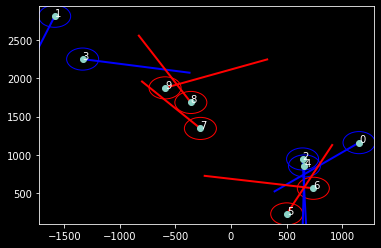

In [11]:
x,y = positions_x, positions_y
#x,y = raw_positions_x, raw_positions_y
plt.plot(x, y, "o")
ax = plt.gca()

x_min, x_max = np.amin(only_pos_sample[data_loader.get_feature_column_names('PositionX')].min()), np.amax(only_pos_sample[data_loader.get_feature_column_names('PositionX')].max())
y_min, y_max = np.amin(only_pos_sample[data_loader.get_feature_column_names('PositionY')].min()), np.amax(only_pos_sample[data_loader.get_feature_column_names('PositionY')].max())

print(x_min,x_max)
print(y_min,y_max)
print("Tick: " + str(tick))

#plt.xlim(-500,500)
#plt.ylim(-500,500)
lines = []
for i, (pos_x, pos_y, end_pos_x, end_pos_y) in enumerate(zip(positions_x,positions_y,end_positions_x,end_positions_y)):
    lines.append([(pos_x, pos_y), (end_pos_x, end_pos_y)])
    # plot circles using the RGBA colors
    col = 'red' if i > 4 else 'blue'
    circle = plt.Circle((pos_x, pos_y), 144, color=col, fill=False)
    ax.add_artist(circle)
    ax.text(pos_x, pos_y, i)

lc = LineCollection(lines[:5], color=["blue"], lw=2)
lc2 = LineCollection(lines[5:], color=["red"], lw=2)

plt.gca().add_collection(lc)
plt.gca().add_collection(lc2)

plt.show()

In [17]:
#plt.plot([0, 0], [90, 200], 'm-')
spheres = preprocess.generate_player_spheres(positions,144)[:5]

In [18]:
hits = preprocess.get_player_raycast_hits(positions[5], directions[5], spheres)

print(hits)

[0, 1, 0, 0, 0]
